# Whitening in PCA

-> There are two things we are trying to accomplish with whitening:

1. Make the features less correlated with one another.

2. Give all of the features the same variance.

-> Whitening has two simple steps:

1. Project the dataset onto the eigenvectors. This rotates the dataset so that there is no correlation between the components.

2. Normalize the the dataset to have a variance of 1 for all components. This is done by simply dividing each component by the square root of its eigenvalue.

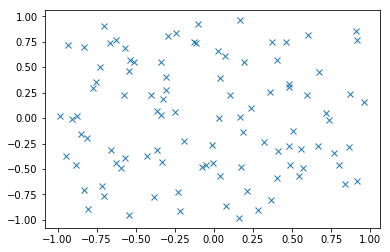

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=-1, upp=1):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

np.random.seed(42)

x1 = get_truncated_normal()
x1 = x1.rvs(100)
x2 = get_truncated_normal()
x2 = x2.rvs(100)
plt.plot(x1, x2, 'x')
plt.show()

In [2]:
y = np.c_[x1, x2].T
y.shape

(2, 100)

In [3]:
sigma = 1 / 100 * y.dot(y.T)
sigma

array([[ 0.30921983, -0.00779793],
       [-0.00779793,  0.29479197]])

In [4]:
w, v = np.linalg.eig(sigma)
w, v

(array([0.31262891, 0.29138288]), array([[ 0.91626552,  0.40057147],
        [-0.40057147,  0.91626552]]))

In [5]:
u1 = v.T[0]   # the principal direction of variation of the data
u2 = v.T[1]   # orthogonal to u1

In [6]:
## Change of basis

x = v.T.dot(y)
x[:2]
cov =  1/ 100 * x.dot(x.T)
cov

array([[3.12628915e-01, 2.44249065e-17],
       [2.44249065e-17, 2.91382881e-01]])

## Whitening step

\begin{align}
x_{\rm PCAwhite,i} = \frac{x_{\rm i} }{\sqrt{\lambda_i}}.   
\end{align}

In [7]:
## Whitening Step

x[0, :] = x[0, :] / np.sqrt(w[0])
x[1, :] = x[1, :] / np.sqrt(w[1])

In [8]:
### Covariance equal to identity matrix

cov =  1/ 100 * x.dot(x.T)
cov

array([[1.00000000e+00, 8.43769499e-17],
       [8.43769499e-17, 1.00000000e+00]])

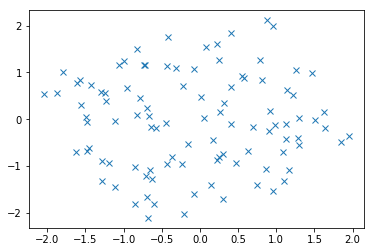

In [9]:
plt.plot(x[0, :], x[1, :], 'x')

In [10]:
pca = u1.T.dot(y)
pca[:10]

array([ 0.16824683,  0.70226979,  0.50335226,  0.14955945, -0.88189645,
       -0.39750198, -0.71502594,  0.43680161,  0.35247507,  0.65481888])

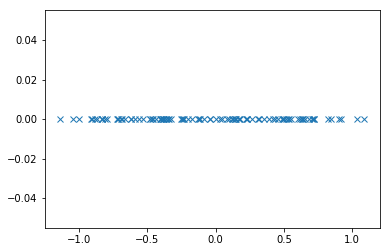

In [11]:
plt.plot(pca, np.zeros(100), 'x')

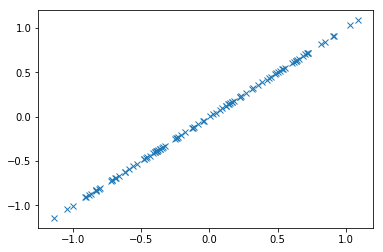

In [12]:
plt.plot(pca, pca, 'x')